<a href="https://www.kaggle.com/code/kaushalpowar/project-autompg-dataset?scriptVersionId=104775204" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


In [2]:

#In this notebook I am going to perform following activities
#a. Load the dataset
#b. Identify the dimension, structure, & summary of the dataset
#c. Plots histogram/barplot for variables
#d. Plot the Boxplot. Identify if there are any outliers & treat them.
#Display the boxplot before & after outliers treatment
#e.Check if dataset has any 'na' values & treat them.
#f. Standardize the continuous variables.


In [3]:
dataset = pd.read_csv('/kaggle/input/autompg-dataset/auto-mpg.csv')

In [4]:
#To understand the data look at dimension
dataset.shape

(398, 9)

In [5]:
#Names of columns
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
#Structure of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
#summary of the data
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
dataset.tail() #or data[-5:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [9]:
#Visualization

In [10]:
#import necessary packages
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
#this helps to print results just below to our code

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

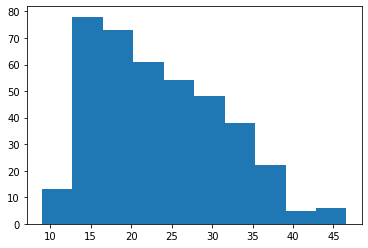

In [11]:
#Histogram for each continuous data
plt.hist(dataset['mpg'])

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

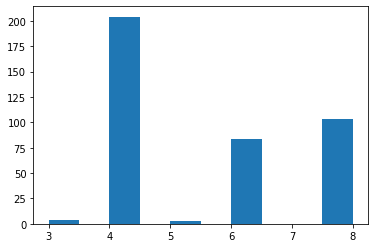

In [12]:
plt.hist(dataset['cylinders'])

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

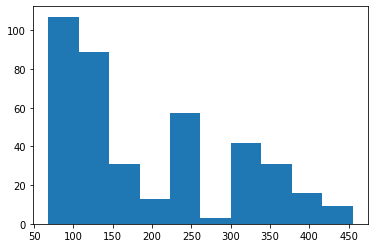

In [13]:
plt.hist(dataset['displacement'])   

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

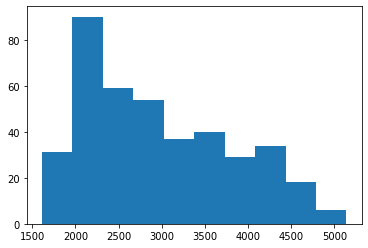

In [14]:
plt.hist(dataset['weight'])

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

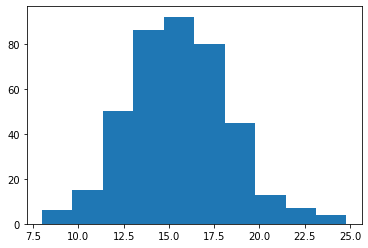

In [15]:
plt.hist(dataset['acceleration'])

(array([57., 28., 40., 27., 30., 62., 36., 29., 29., 60.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <BarContainer object of 10 artists>)

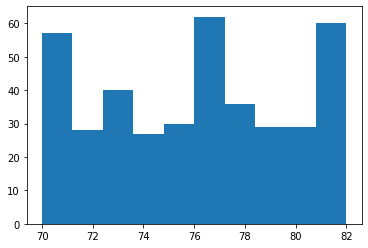

In [16]:
plt.hist(dataset['model year'])

(array([249.,   0.,   0.,   0.,   0.,  70.,   0.,   0.,   0.,  79.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

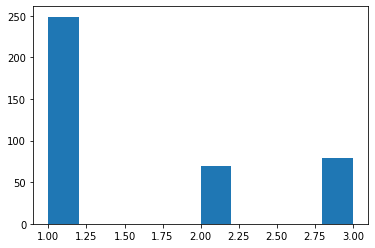

In [17]:
plt.hist(dataset['origin'])

In [18]:
dataset['horsepower'] = pd.Categorical(dataset['horsepower'])
dataset['car name'] = pd.Categorical(dataset['car name'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

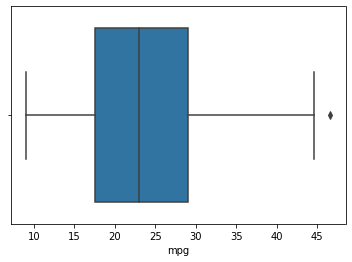

In [19]:
#check if our data have any outliers
sn.boxplot(dataset['mpg'])

In [20]:
#To calculate the 5th and 95th quartile
print(dataset['mpg'].quantile(0.05))
print(dataset['mpg'].quantile(0.95))

13.0
37.029999999999994


In [21]:
#To replace outlier values
dataset['mpg'] = np.where(dataset['mpg']>37.029,37.029,dataset['mpg'])
dataset['mpg'] = np.where(dataset['mpg']<13.0,13.0,dataset['mpg'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

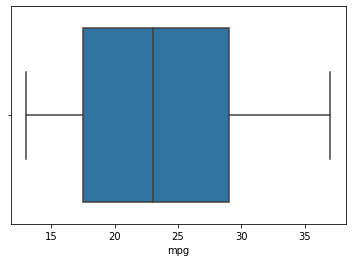

In [22]:
sn.boxplot(dataset['mpg'])
#now there are not outlier values

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cylinders'>

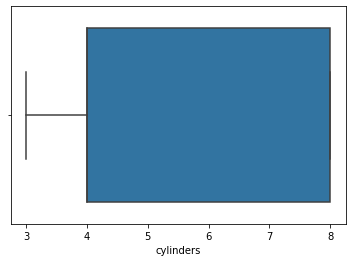

In [23]:
sn.boxplot(dataset['cylinders'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weight'>

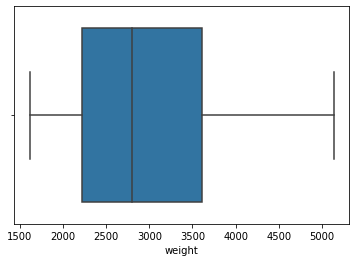

In [24]:
sn.boxplot(dataset['weight'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='acceleration'>

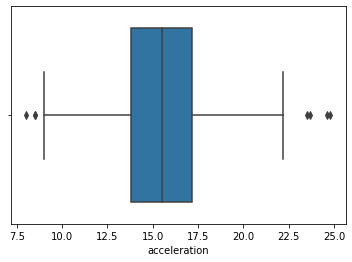

In [25]:
sn.boxplot(dataset['acceleration'])

In [26]:
print(dataset['acceleration'].quantile(0.05))
print(dataset['acceleration'].quantile(0.95))

11.285
20.414999999999996


In [27]:
dataset['acceleration'] = np.where(dataset['acceleration']>20.4149,20.4149,dataset['acceleration'])
dataset['acceleration'] = np.where(dataset['acceleration']<11.285,11.285,dataset['acceleration'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='acceleration'>

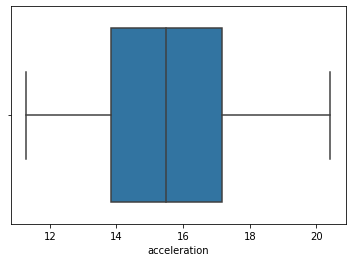

In [28]:
sn.boxplot(dataset['acceleration'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='model year'>

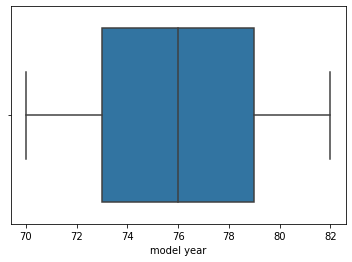

In [29]:
sn.boxplot(dataset['model year'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='origin'>

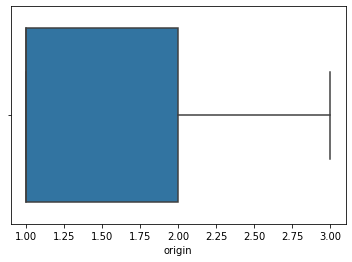

In [30]:
sn.boxplot(dataset['origin'])

In [31]:
#Check if dataset have any missing values
dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [32]:
#to scale the data import
from sklearn import preprocessing

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()

In [34]:
dataset[['mpg','displacement','weight','acceleration']] = min_max_scaler.fit_transform(dataset[['mpg','displacement','weight','acceleration']])

In [35]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.208082,8,0.617571,130,0.536150,0.078314,70,1,chevrolet chevelle malibu
1,0.083233,8,0.728682,165,0.589736,0.023549,70,1,buick skylark 320
2,0.208082,8,0.645995,150,0.516870,0.000000,70,1,plymouth satellite
3,0.124849,8,0.609819,150,0.516019,0.078314,70,1,amc rebel sst
4,0.166466,8,0.604651,140,0.520556,0.000000,70,1,ford torino
